<div class = 'alert alert block alert-info'>
Q. A gas well is producing under a pseudosteady-state condition in a reservoir having an permeability of 20md. Estimate the well production rate by the pseudopressure approach and compare the result with that of the pressure-squared approach. 
    formation thickness, ft = 10<br>
    $P_{avg}$, psia = 2000<br> 
    $P_{wf}$, psia = 1000<br>   
    ratio of external drainage radius over wellbore radius = 2000<br>   
    reservoir temperature , °F = 130<br> </div>  
    <h5><center> PVT DATA </center></h5>
    
  |   S.N |   pressure, psia |   viscosity, cp |   gas compressibility factor |
|------:|-----------------:|----------------:|-----------------------------:|
|     0 |             14.7 |         0.0118  |                       0.9983 |
|     1 |            200   |         0.01228 |                       0.9831 |
|     2 |            400   |         0.01268 |                       0.9682 |
|     3 |            600   |         0.01306 |                       0.9541 |
|     4 |            800   |         0.01351 |                       0.9409 |
|     5 |           1000   |         0.01397 |                       0.9291 |
|     6 |           1200   |         0.01439 |                       0.9188 |
|     7 |           1400   |         0.01485 |                       0.9107 |
|     8 |           1600   |         0.01533 |                       0.9032 |
|     9 |           1800   |         0.01577 |                       0.8984 |
|    10 |           2000   |         0.01624 |                       0.8949 |
|    11 |           2200   |         0.01671 |                       0.8919 |
|    12 |           2400   |         0.01716 |                       0.8891 |

In [1]:
import pandas as pd
import numpy as np
p = [14.7, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400]
uyo = [.0118, 0.01228,0.01268,0.01306,0.01351, 0.01397, 0.01439,0.01485, 0.01533, 0.01577, 0.01624, 0.01671, 0.01716]
z = [.9983, .9831, .9682, .9541, .9409, .9291, .9188, .9107, .9032, .8984, .8949, .8919, .8891]
df = pd.DataFrame({'p':p,'\u03BC':uyo, 'z':z})
df

,p,μ,z
0,14.7,0.01180,0.9983
1,200.0,0.01228,0.9831
2,400.0,0.01268,0.9682
3,600.0,0.01306,0.9541
4,800.0,0.01351,0.9409
5,1000.0,0.01397,0.9291
6,1200.0,0.01439,0.9188
7,1400.0,0.01485,0.9107
8,1600.0,0.01533,0.9032
9,1800.0,0.01577,0.8984


Text(0, 0.5, 'z')

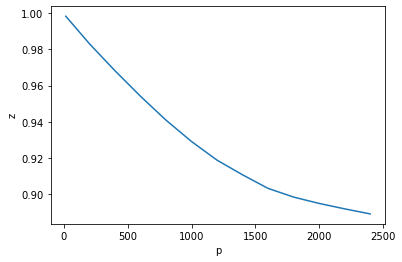

In [2]:
import matplotlib.pyplot as plt
plt.plot(df['p'], df['z']);
plt.xlabel('p')
plt.ylabel('z')

Text(0, 0.5, 'μ')

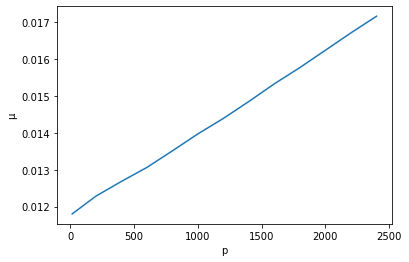

In [3]:
plt.plot(df['p'], df['μ']);
plt.xlabel('p')
plt.ylabel('μ')

<div class = 'alert alert block alert-info'>
    <Strong>Pseudo pressure</Strong>
$$ m(p), \frac {psi^{2}}{cp}  = \int_{p_{0}}^{p} \frac{2p}{μz} dp$$ <br></div>

In [4]:
df['pressure difference'] = df['p'].diff(periods = 1)
df['p/(\u03BC*z)'] = df['p']/(df['\u03BC']*df['z'])
df                          

,p,μ,z,pressure difference,p/(μ*z)
0,14.7,0.01180,0.9983,NaN,1247.884115
1,200.0,0.01228,0.9831,185.3,16566.620843
2,400.0,0.01268,0.9682,200.0,32581.843963
3,600.0,0.01306,0.9541,200.0,48151.983067
4,800.0,0.01351,0.9409,200.0,62934.845364
5,1000.0,0.01397,0.9291,200.0,77044.410016
6,1200.0,0.01439,0.9188,200.0,90761.040400
7,1400.0,0.01485,0.9107,200.0,103520.472467
8,1600.0,0.01533,0.9032,200.0,115556.372154
9,1800.0,0.01577,0.8984,200.0,127048.946595


In [5]:
add = []
for i in range(len(df)):
    try:
        x = (df['p/(\u03BC*z)'][i] + df['p/(\u03BC*z)'][i+1])/2
        add.append(x) 
    except:
        break
add

[8907.252479126542,
 24574.232403168066,
 40366.91351506868,
 55543.41421558306,
 69989.62768991862,
 83902.72520786131,
 97140.7564336466,
 109538.42231067756,
 121302.65937437645,
 132332.55764181638,
 142615.5123105303,
 152460.07663340116]

In [6]:
add.insert(0, 'NaN')
add

['NaN',
 8907.252479126542,
 24574.232403168066,
 40366.91351506868,
 55543.41421558306,
 69989.62768991862,
 83902.72520786131,
 97140.7564336466,
 109538.42231067756,
 121302.65937437645,
 132332.55764181638,
 142615.5123105303,
 152460.07663340116]

In [7]:
df['p/$(\u03BC*z)_{avg}$'] = add
df

,p,μ,z,pressure difference,p/(μ*z),p/$(μ*z)_{avg}$
0,14.7,0.01180,0.9983,NaN,1247.884115,NaN
1,200.0,0.01228,0.9831,185.3,16566.620843,8907.252479
2,400.0,0.01268,0.9682,200.0,32581.843963,24574.232403
3,600.0,0.01306,0.9541,200.0,48151.983067,40366.913515
4,800.0,0.01351,0.9409,200.0,62934.845364,55543.414216
5,1000.0,0.01397,0.9291,200.0,77044.410016,69989.62769
6,1200.0,0.01439,0.9188,200.0,90761.040400,83902.725208
7,1400.0,0.01485,0.9107,200.0,103520.472467,97140.756434
8,1600.0,0.01533,0.9032,200.0,115556.372154,109538.422311
9,1800.0,0.01577,0.8984,200.0,127048.946595,121302.659374


In [8]:
df['2$\Delta $p /$(\u03BC*z)_{avg}$'] = 2*df['p/$(\u03BC*z)_{avg}$']*df['pressure difference']
df['m(p)'] = df['2$\Delta $p /$(\u03BC*z)_{avg}$'].cumsum()
df

,p,μ,z,pressure difference,p/(μ*z),p/$(μ*z)_{avg}$,2$\Delta $p /$(μ*z)_{avg}$,m(p)
0,14.7,0.01180,0.9983,NaN,1247.884115,NaN,NaN,NaN
1,200.0,0.01228,0.9831,185.3,16566.620843,8907.252479,3301027.768764,3301027.768764
2,400.0,0.01268,0.9682,200.0,32581.843963,24574.232403,9829692.961267,13130720.730032
3,600.0,0.01306,0.9541,200.0,48151.983067,40366.913515,16146765.406027,29277486.136059
4,800.0,0.01351,0.9409,200.0,62934.845364,55543.414216,22217365.686233,51494851.822292
5,1000.0,0.01397,0.9291,200.0,77044.410016,69989.62769,27995851.075967,79490702.89826
6,1200.0,0.01439,0.9188,200.0,90761.040400,83902.725208,33561090.083145,113051792.981404
7,1400.0,0.01485,0.9107,200.0,103520.472467,97140.756434,38856302.573459,151908095.554863
8,1600.0,0.01533,0.9032,200.0,115556.372154,109538.422311,43815368.924271,195723464.479134
9,1800.0,0.01577,0.8984,200.0,127048.946595,121302.659374,48521063.749751,244244528.228884


Text(0, 0.5, 'z')

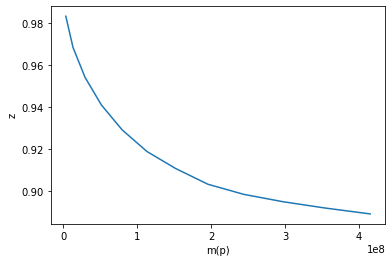

In [9]:
plt.plot(df['m(p)'], df['z']);
plt.xlabel('m(p)')
plt.ylabel('z')

<div class = 'alert alert block alert-success'>
<Strong>Flow Rate in Pseudosteady state Condition at Average Reservoir Pressure Using Pseudo pressure Approach</Strong><br><br><div class = 'alert alert block alert-info'>
$$ Flow Rate(Q), Mscf/day  = \frac{kh[m(p_{avg_{r}}) - m(p_{wf})]}{1422T[ln(\frac{r_{e}}{r_{w}}) - .75]}$$<br></div>

Given:<br>
   formation thickness,ft = 10<br>
   k = 20 md<br>
    $P_{avg}$, psia = 2000<br>
    $P_{wf}$, psia = 1000   
    ratio of external drainage radius over wellbore radius (re/rw) , let's assume it as x = 2000   
    reservoir temperature , °F = 130, but in equation we need temperature in °R
    $$T(°R) = 460+T(°F)$$
    
From above table At $P_{avg}$, psia = 2000 , value of m(p) is 297177551.285611<br>
At $P_{wf}$, psia = 1000 , value of m(p) is 79490702.89825967
    </div>

In [10]:
# Given:
m_pavg = df.loc[10, 'm(p)']
m_pwf = df.loc[5, 'm(p)']
k = 20
h = 10
x = 2000
T = 130+460


q = k*h*(m_pavg-m_pwf)/(1422*T*(np.log(x) - .75))
print('FLow rate by pseudo pressure method is :', q, 'MScf/day')

FLow rate by pseudo pressure method is : 7574.653922357367 MScf/day


<Strong>Flow Rate in Pseudosteady state Condition at Average Reservoir Pressure Using Pseudo pressure Approach</Strong><br><br><div class = 'alert alert block alert-success'>
$$ Flow Rate(Q), scf/day  = \frac{kh[{p_{avg_{e}}}^2 - {p_{wf}}^2]}{1422T*(μ*z)_{avg}[ln(\frac{r_{e}}{r_{w}}) - .75]}$$<br>
</div>

$P_{avg}$ in pressure square method:<br>
<div class = 'alert alert block alert-success'>
$$ P_{avg} = \sqrt{\frac{(P_2)^2 - (P_1)^2}{2}}$$</div>

we have to calculate z and μ at this pressure

<br><div class = 'alert alert block alert-success'>
calculate μ between x1, and x2 ,assuming linear approximation:
$$ μ_3 = \frac{(x_2-x_3)*μ_1 + (x_3-x_1)*μ_2}{(x_2-x_3) -(x_3-x_1)}$$
    </div>

In [11]:
p1 = 1000
p2 = 2000
ps_avg = np.sqrt((p2**2 + p1**2 )/2)
ps_avg

1581.1388300841897

In [12]:
x3 = ps_avg
x1 = 1400
x2 = 1600
a = x3-x1
b = x2-x1
μ_1 = df.iloc[7, 1]
μ_2 = df.iloc[8, 1]
μ_3 = (a*μ_2 + b*μ_1)/(a+b)
μ_3

0.015078123275765961

In [13]:
z_1 = df.iloc[7, 2]
z_2 = df.iloc[8, 2]
z_3 = (a*z_2 + b*z_1)/(a+b)
z_3

0.9071355738161568

In [14]:
q1 = k*h*(p2**2 - p1**2)/(1422*z_3*μ_3*T*(np.log(x) - .75))
print('FLow rate by pressure square method is :', q1, 'MScf/day')

FLow rate by pressure square method is : 7631.8947071937 MScf/day


` Because we don't have data of z and μ at 1581 psi , so we aasume linear approximation , that's why we got more different result`

In [15]:
error = (q1 - q)*100/q
print('error', error ,'%')

error 0.7556884502324351 %
